In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Problem 1: Using the Semi-Empirical Mass Formula

In [2]:
def isEven(a):
    #simple function to check for even or odd A or Z
    if a%2==0:
        return True
    else:
        return False

def Binding_Energy(A,Z):
    if (A<0) or (Z<0) or (type(A)==str) or (type(Z)==str):
        print("A and Z should be positive numbers.")
        return(0)
    a1 = 15.8 #values of a1, a2, etc. taken from homework prompt
    a2 = 18.3
    a3 = 0.714
    a4 = 23.2
    if not isEven(A):
        a5=0
    elif isEven(Z):
        a5=12.0
    else:
        a5=-12.0
    return(a1*A-a2*A**(2/3)-a3*(Z**2)/(A**(1/3))-a4*((A-2*Z)**2)/A-a5/(A**(1/2)))

## Part a) Finding the Binding Energy for A = 58 and Z = 28

In [3]:
print(Binding_Energy(58,28)," MeV")

494.4106662338041  MeV


## Part b) Printing B/A

In [4]:
def Binding_Energy_Per_Nucleon(A,Z):
    #we define a new function that calls the original function.
    #this new function returns the binding energy divided by the mass number
    return(round((Binding_Energy(A,Z))/A,4))

In [5]:
print(Binding_Energy_Per_Nucleon(58,28)," MeV/Nucleon")

8.5243  MeV/Nucleon


## Part c) Most Stable Mass number for a given Atomic number

In [6]:
def Most_Stable(Z):
    highest_energy = -np.inf
    #we iterate through A=Z to A=3Z, as per the instructions
    for A in range(Z,(3*Z+1)):
        #we call our Binding energy per nucleon from the previous function
        current_energy = Binding_Energy_Per_Nucleon(A,Z)
        
        #and compare to the current highest energy
        if current_energy>highest_energy:
            #if true, we store the current energy and mass number
            highest_energy = current_energy
            most_stable_A = A
    return(most_stable_A,Binding_Energy_Per_Nucleon(most_stable_A,Z))

def Part_c_Presentation(Z=21):
    #this is just to answer the problem prompt...
    a, b_a = Most_Stable(Z)
    print("For a given atomic number Z=",str(Z),", the most stable mass number is A=",str(a)," with a binding energy of B/A=",str(b_a)," MeV per nucleon.")

In [7]:
Part_c_Presentation()

For a given atomic number Z= 21 , the most stable mass number is A= 46  with a binding energy of B/A= 8.6452  MeV per nucleon.


## Part d) Maximum Binding Energy for Z = 1 to Z = 100

In [8]:
def Max_Binding_Energy(zmin=1,zmax=100):
    #initializing lists for storing A's, Z's, and B/A's
    z_list = []
    a_list = []
    b_a_list = []
    #iterates through the min Z to the max Z
    for Z in range(zmin,(zmax+1)):
        #building the lists, calling the function from part C
        z_list.append(Z)
        a_list.append(Most_Stable(Z)[0])
        b_a_list.append(Most_Stable(Z)[1])
    return(z_list,b_a_list)

def Part_d_Presentation(zmin=1,zmax=100):
    Zs, BAs = Max_Binding_Energy(zmin=zmin,zmax=zmax)
    print("Z:          Binding Energy Per Nucleon:")
    print()
    for i in range(len(Zs)):
        print(Zs[i],"        ",BAs[i])

In [9]:
print("Z with highest binding Energy per Nucleon:")
((Max_Binding_Energy()[1]).index(max(Max_Binding_Energy()[1])))+1

Z with highest binding Energy per Nucleon:


27

In [10]:
Part_d_Presentation()

Z:          Binding Energy Per Nucleon:

1          5.2346
2          3.8361
3          5.9562
4          6.1056
5          6.8568
6          7.039
7          7.4949
8          7.5573
9          7.8951
10          7.882
11          8.1487
12          8.1442
13          8.3169
14          8.3202
15          8.4321
16          8.4385
17          8.5358
18          8.5173
19          8.6035
20          8.5843
21          8.6452
22          8.6302
23          8.6742
24          8.6559
25          8.6962
26          8.6713
27          8.7034
28          8.6815
29          8.7019
30          8.6797
31          8.6987
32          8.6722
33          8.6861
34          8.6619
35          8.6699
36          8.6438
37          8.6512
38          8.6247
39          8.6262
40          8.6015
41          8.6021
42          8.5745
43          8.5733
44          8.5473
45          8.5432
46          8.5154
47          8.5114
48          8.4847
49          8.4774
50          8.4503
51          8.4431
5

## Part e) Plotting the results

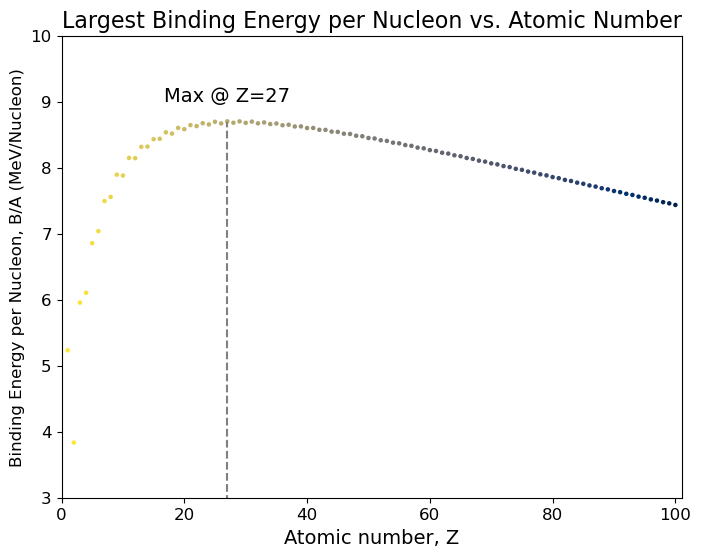

In [11]:
#get x and y data for the plot
prob1x, prob1y = Max_Binding_Energy()

plt.figure(figsize=(8,6))
plt.scatter(prob1x,prob1y,s=5, c=prob1x, cmap="cividis_r")
plt.xlim(0,101)
plt.ylim(3,10)
plt.text(27,9,"Max @ Z=27",horizontalalignment="center",fontsize=14)
plt.vlines(27,0,8.7,color="grey",linestyle="dashed")
plt.xlabel("Atomic number, Z",fontsize=14)
plt.ylabel("Binding Energy per Nucleon, B/A (MeV/Nucleon)",fontsize=12)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title("Largest Binding Energy per Nucleon vs. Atomic Number",fontsize=16);